# 🎮GameSelect


## ✅ Checklist
- [ ] Descrição do problema e público-alvo
- [ ] Carregamento do dataset `games_catalog_G4.csv`
- [ ] Dicionário de dados
- [ ] EDA (exploração, gráficos, estatísticas)
- [ ] Limpeza (ausentes/outliers) e justificativas
- [ ] Vetorização de gêneros (multi-hot)
- [ ] Similaridade cosseno
- [ ] Função de recomendação + casos de teste
- [ ] Insights e próximos passos


## 1. Descrição do Problema
* Objetivo: Recomendar jogos com base na similaridade do último titulo jogado
* Público alvo: Gamers ou pessoas interessadas em jogos
* Critério de sucesso: **recomendar 5 jogos similares** a um título dado

## 2. Carregando o Dataset e as Bibliotecas utilizadas

Carregando as blibiotecas necessárias

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fisicorj/aulacienciadedados/refs/heads/main/games_catalog_G4.csv")
df.tail()

,title,genres,platform,price,rating,reviews_count,release_year,age_rating
25,Brawl Stars,"Action,Multiplayer,MOBA",Mobile,0.00,4.51,45478,2020,12+
26,PUBG Mobile,"Shooter,Battle Royale,Multiplayer",Mobile,9.99,4.20,81055,2024,E
27,Pokemon GO,"AR,Casual,Adventure",Mobile,0.00,4.12,348312,2011,12+
28,Among Us,"Party,Multiplayer,Social Deduction",Mobile,0.00,4.38,151105,2018,12+
29,Call of Duty Mobile,"Shooter,Multiplayer,Action",Mobile,14.99,3.67,44281,2014,18+


## 4. EDA — Análise Exploratória (Utilizando Pandas)

### 4.1 Estrutura e tipos

In [7]:
print("Linhas x Colunas:\n", df.shape) # Exibe número de Linhas x Colunas
print("\nTipos:\n", df.dtypes) # Exibe os tipos de dados

Linhas x Colunas:
 (30, 8)

Tipos:
 title             object
genres            object
platform          object
price            float64
rating           float64
reviews_count      int64
release_year       int64
age_rating        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          30 non-null     object 
 1   genres         30 non-null     object 
 2   platform       30 non-null     object 
 3   price          30 non-null     float64
 4   rating         30 non-null     float64
 5   reviews_count  30 non-null     int64  
 6   release_year   30 non-null     int64  
 7   age_rating     30 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.0+ KB


### 4.2 Estatísticas descritivas

In [9]:
print("Média: \n", df[["price", "rating", "reviews_count", "release_year"]].mean().round(1))
print("\nMediana: \n", df[["price", "rating", "reviews_count", "release_year"]].median().round(1))
print()
df.describe().round(1)

Média: 
 price               106.4
rating                4.1
reviews_count    244289.2
release_year       2016.3
dtype: float64

Mediana: 
 price                88.8
rating                4.1
reviews_count    251471.5
release_year       2016.0
dtype: float64



,price,rating,reviews_count,release_year
count,30.0,30.0,30.0,30.0
mean,106.4,4.1,244289.2,2016.3
std,94.2,0.4,153257.0,4.6
min,0.0,3.5,19112.0,2009.0
25%,15.0,3.8,109224.0,2012.2
50%,88.8,4.1,251471.5,2016.0
75%,205.9,4.4,391368.2,2020.0
max,278.5,4.9,483771.0,2024.0


### 4.3 Valores ausentes

In [10]:
if df.isnull().any().any():
  print("Colunas com valores nulos e suas contagens:")
  print(df.isnull().sum()[df.isnull().sum() > 0])
else:
  print("Não tem valores nulos")

Não tem valores nulos


### 4.4 Distribuições e contagens (exemplos)

In [11]:
contagem_generos = df["genres"].value_counts().sort_index()
contagem_plataforma = df['platform'].value_counts() # .value_counts() Conta quantas vezes cada valor aparece em uma coluna.
contagem_ano = df['release_year'].value_counts().sort_index() # .sort_index() organiza os dados pela ordem dos índices, e não pelos valores das colunas.

print(contagem_plataforma)
print()
print(contagem_generos)
print()
print(contagem_ano)

platform
PC         10
Console    10
Mobile     10
Name: count, dtype: int64

genres
AR,Casual,Adventure                   1
Action,Adventure,Story Rich           2
Action,Hardcore,Adventure             1
Action,Multiplayer,MOBA               1
Action,Open World,Adventure           2
Action,Open World,Story Rich          1
Action,Roguelike,Indie                1
Action,Story Rich,Survival            1
Metroidvania,Indie,Platformer         1
Party,Multiplayer,Social Deduction    1
Platformer,Indie,Precision            1
Puzzle,Casual,Match-3                 1
Puzzle,Co-op,Sci-Fi                   1
RPG,Open World,Adventure              1
RPG,Open World,Anime                  1
RPG,Open World,Story Rich             1
RPG,Tactical,Story Rich               1
Racing,Open World,Simulation          1
Racing,Simulation,Competitive         1
Runner,Casual,Arcade                  1
Sandbox,Survival,Adventure            1
Shooter,Battle Royale,Multiplayer     1
Shooter,Competitive,Multiplayer    

### 4.5 Visualizações (Usando matplotlib)

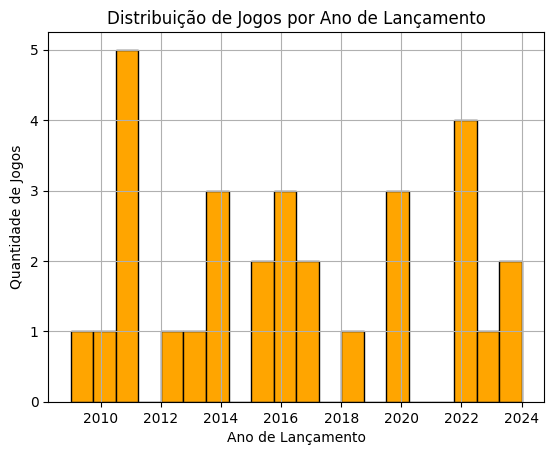

In [16]:
plt.hist(df["release_year"], bins=20, color="orange", edgecolor="black")
plt.title("Distribuição de Jogos por Ano de Lançamento")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Quantidade de Jogos")
plt.grid(True)
plt.show()

## 5. Limpeza de Dados (ausentes e outliers)
Descreva o que foi feito e por quê.

## 6. Preparação para Recomendação — Vetorização de Gêneros

Exploda a coluna `genres` e crie uma matriz **multi-hot** (uma coluna por gênero).

## 7. Similaridade Cosseno

## 8. Função de Recomendação

## 9. Teste do Recomendador

## 10. Visualização dos Resultados

## 11. Insights e Próximos Passos